In [13]:
import pandas as pd
import numpy as np

# Seaborn and Matplotlib for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn preprocessing for dealing with categorical variables (for label encoding)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [14]:
# Read train data
ab_train = pd.read_csv('train.csv')
#ab_train.isnull().sum()
#ab_train.info()

In [15]:
# Read test data
ab_test = pd.read_csv('test.csv')

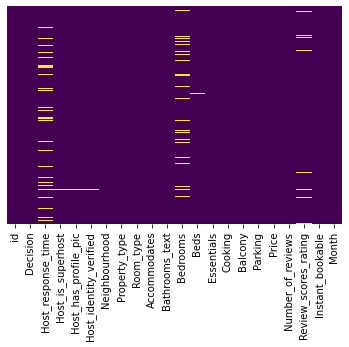

In [16]:
## Checking missing data
sns.heatmap(ab_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('missing_data.png')

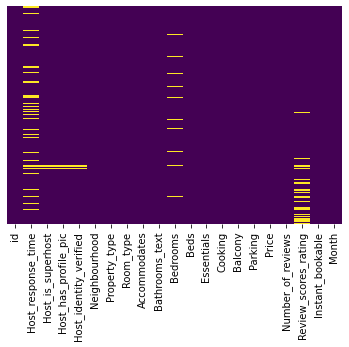

In [17]:
sns.heatmap(ab_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('test_missing_data.png')

In [18]:
## Examine Missing Values

# Function to calculate missing values by column # Func
def missing_values_table(df):
    
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
               "There are " + str(mis_val_table_ren_columns.shape[0]) +
               " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [19]:
# Missing values statistics
missing_values = missing_values_table(ab_train)
missing_values.head(20)

Your selected dataframe has 22 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Host_response_time,858,11.5
Bedrooms,585,7.8
Review_scores_rating,395,5.3
Host_is_superhost,96,1.3
Host_has_profile_pic,96,1.3
Host_identity_verified,96,1.3
Beds,13,0.2


In [20]:
## Converting Categorical Features

# Cleaning up Price's currency data with pandas
ab_train['Price'] = ab_train['Price'].replace({'\$':'',',':''},regex=True).astype('float')
ab_test['Price'] = ab_test['Price'].replace({'\$':'',',':''},regex=True).astype('float')


In [21]:
## Encoding Categorical Vairables

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in ab_train:
    if ab_train[col].dtype == 'object':
        unique_list = list(ab_train[col].unique())
        unique_list = [x for x in unique_list if pd.isnull(x)==False]
        # If 2 or fewer unique categories
        if len(unique_list) <= 2:
            # Train on the training data
            le.fit(ab_train[col])
            # Transform both training and testing data
            ab_train[col] = le.transform(ab_train[col])
            ab_test[col] = le.transform(ab_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            print(col)
print('%d columns were label encoded.' % le_count)

Host_is_superhost
Host_has_profile_pic
Host_identity_verified
Instant_bookable
4 columns were label encoded.


In [22]:
# one-hot encoding of categorical variables

ab_train = pd.get_dummies(ab_train)
ab_test = pd.get_dummies(ab_test)

print('Training Features shape: ', ab_train.shape)
print('Testing Features shape: ', ab_test.shape)

ab_train.fillna(ab_train.mean(), inplace = True)
ab_test.fillna(ab_test.mean(), inplace = True)

Training Features shape:  (7471, 107)
Testing Features shape:  (2440, 89)


In [23]:
## Aligining Training and Testing Data

train_labels = ab_train['Decision']

# Align the training and testing data, keep only columns present in both dataframes
ab_train, ab_test = ab_train.align(ab_test, join = 'inner', axis = 1)

# Add the target back in
ab_train['Decision'] = train_labels

In [24]:
## Imputing missing values for sklearn decision tree

# retrieve the numpy array
train_values = ab_train.values
test_values = ab_test.values

#degine the imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_train_values = imp.fit_transform(train_values)
transformed_test_values = imp.fit_transform(test_values)

# Set up the train data with columns that are in use


<AxesSubplot:>

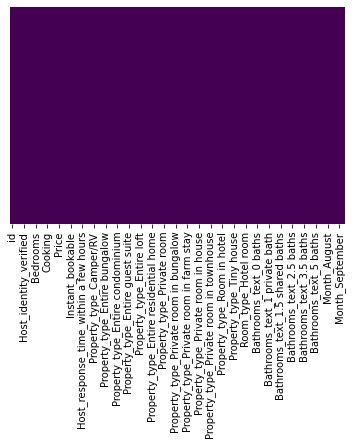

In [25]:
# Check that heat map again to make sure no null data
sns.heatmap(ab_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
## Build a Logistic Regression model
X = ab_train.drop(['Decision','id'], axis=1)
y = ab_train['Decision']
# Train Test Split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test= train_test_split(X,y test_size = 0.2, random_state = 0)

PermissionError: [Errno 13] Permission denied: 'result_logistic regression.csv'

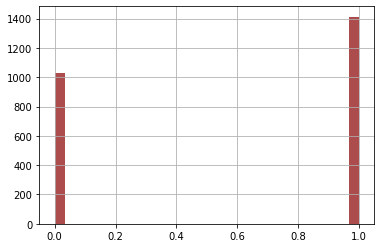

In [32]:
## Training and Predicting

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X,y)
X_test = ab_test.drop(['id'],axis=1)
predictions = clf.predict(X_test)

id = ab_test['id'].values.tolist()
df = pd.DataFrame({'id':id,'Decision':predictions})
de = df['Decision']
de.hist(bins=30, color='darkred',alpha=0.7)
plt.savefig('hist_Decision_LR.png')

df.to_csv('result_logistic regression.csv', index = False)

In [246]:
0.35655

0.35655

Host_is_superhost
Host_has_profile_pic
Host_identity_verified
Instant_bookable
4 columns were label encoded.
Training Features shape:  (7471, 107)
Testing Features shape:  (2440, 89)


c:\users\owner\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


        id  Decision
0        1         0
1        2         1
2        3         1
3        4         1
4        5         1
...    ...       ...
2435  2436         1
2436  2437         1
2437  2438         1
2438  2439         1
2439  2440         1

[2440 rows x 2 columns]
Wall time: 769 ms


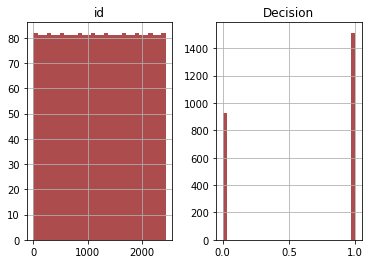

In [3]:
%%time

import pandas as pd
import numpy as np

# Seaborn and Matplotlib for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn preprocessing for dealing with categorical variables (for label encoding)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Read train data
ab_train = pd.read_csv('train.csv')

# Read test data
ab_test = pd.read_csv('test.csv')

## Converting Categorical Features

# Cleaning up Price's currency data with pandas
ab_train['Price'] = ab_train['Price'].replace({'\$':'',',':''},regex=True).astype('float')
ab_test['Price'] = ab_test['Price'].replace({'\$':'',',':''},regex=True).astype('float')


## Encoding Categorical Vairables

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in ab_train:
    if ab_train[col].dtype == 'object':
        unique_list = list(ab_train[col].unique())
        unique_list = [x for x in unique_list if pd.isnull(x)==False]
        # If 2 or fewer unique categories
        if len(unique_list) <= 2:
            # Train on the training data
            le.fit(ab_train[col])
            # Transform both training and testing data
            ab_train[col] = le.transform(ab_train[col])
            ab_test[col] = le.transform(ab_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            print(col)
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables

ab_train = pd.get_dummies(ab_train)
ab_test = pd.get_dummies(ab_test)

print('Training Features shape: ', ab_train.shape)
print('Testing Features shape: ', ab_test.shape)

ab_train.fillna(ab_train.mean(), inplace = True)
ab_test.fillna(ab_test.mean(), inplace = True)

## Aligining Training and Testing Data

train_labels = ab_train['Decision']

# Align the training and testing data, keep only columns present in both dataframes
ab_train, ab_test = ab_train.align(ab_test, join = 'inner', axis = 1)

# Add the target back in
ab_train['Decision'] = train_labels

## Imputing missing values for sklearn decision tree

# retrieve the numpy array
train_values = ab_train.values
test_values = ab_test.values

#degine the imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_train_values = imp.fit_transform(train_values)
transformed_test_values = imp.fit_transform(test_values)

ab_train_par = ab_train[['Bathrooms_text_1 private bath','Property_type_Entire condominium','Host_identity_verified','Host_is_superhost','Room_type_Hotel room','Price','Property_type_Room in bed and breakfast','Property_type_Private room in bed and breakfast','Number_of_reviews','Property_type_Entire condominium (condo)','Month_August','Accommodates','Instant_bookable','Host_response_time_within an hour','Host_response_time_within an hour','Host_response_time_within a day','Host_response_time_within a few hours','Property_type_Entire bungalow','Essentials','Property_type_Entire house','Month_July','Host_response_time_a few days or more','Month_June','Parking','Property_type_Entire guesthouse','Bathrooms_text_1.5 baths','Property_type_Entire cottage','Room_type_Entire home/apt']]
ab_test_par = ab_test[['Bathrooms_text_1 private bath','Property_type_Entire condominium','Host_identity_verified','Host_is_superhost','Room_type_Hotel room','Price','Property_type_Room in bed and breakfast','Property_type_Private room in bed and breakfast','Number_of_reviews','Property_type_Entire condominium (condo)','Month_August','Accommodates','Instant_bookable','Host_response_time_within an hour','Host_response_time_within an hour','Host_response_time_within a day','Host_response_time_within a few hours','Property_type_Entire bungalow','Essentials','Property_type_Entire house','Month_July','Host_response_time_a few days or more','Month_June','Parking','Property_type_Entire guesthouse','Bathrooms_text_1.5 baths','Property_type_Entire cottage','Room_type_Entire home/apt']]

## Build a Logistic Regression model
X = ab_train_par
y = ab_train['Decision']

## Training and Predicting

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X,y)
X_test = ab_test_par
predictions = clf.predict(X_test)

id = ab_test['id'].values.tolist()
df = pd.DataFrame({'id':id,'Decision':predictions})
print(df)
df.hist(bins=30, color='darkred',alpha=0.7)

df.to_csv('result_logistic regression.csv', index = False)
